# HOMEWORK part 1

Task 4.10: Coding Etiquette & Excel Reporting

Content:

1. Importing libraries and files
2. Security implications
3. Comparing customer behaviour by regions
4. Low-activity customers
5. Customer profiling
6. Visualizations of the profiles
7. Frequency and expenditure in customer profiles
8. Comparing customer profiles by regions and departments
9. Visualizations

# 1 . Importing libraries and files

Task: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing the pkl file

df_COP_large = pd.read_pickle(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_CPO_merged.pkl')

In [11]:
df_COP_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642450 entries, 0 to 32642449
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_of_the_week       float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  first_name              object 
 14  last_name               object 
 15  gender                  object 
 16  state                   object 
 17  age                     int64  
 18  date_joined             object 
 19  n_dependants            int64  
 20  fam_status              object 
 21  income                  int64

In [4]:
# Since I had so many problems with the dataset size, I am creating a sample containing 20% of records. 
# Total entries for the entire set = 32642450 before sampling.

dev = np.random.rand(len(df_COP_large)) <= 0.9

In [5]:
small_df_COP = df_COP_large[~dev]

In [6]:
# Export the file and then import again to work on a smaller set

small_df_COP.to_pickle(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_CPO_merged_small.pkl')

In [2]:
df_COP = pd.read_pickle (r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_CPO_merged_small.pkl')

In [3]:
df_COP.head()

,order_id,user_id,order_number,order_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362.0,1.0,10.0,4.0,8.0,30.0,196.0,1.0,1.0,Soda,...,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
14,2254736.0,1.0,4.0,4.0,7.0,29.0,12427.0,2.0,1.0,Original Beef Jerky,...,4.4,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
31,3108588.0,1.0,8.0,1.0,14.0,14.0,10258.0,3.0,1.0,Pistachios,...,3.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
47,473747.0,1.0,3.0,3.0,12.0,21.0,30450.0,5.0,0.0,Creamy Almond Butter,...,3.2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. Security implications

Task: Consider any security implications that might exist for this new data.
You’ll need to address any PII data in the data before continuing your analysis.

PII (personally identifiable information) is data that could potentially lead to tracing back to a particualr person. 
Particualry sensitive are names, email addresses, physical addressses, and phone numbers. In my dataset, there are two columns that contain PII: "first_name" and "last_name". I need to drop both columns.

In [4]:
# Display the column names to check for the PII-sensitive ones

df_COP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264017 entries, 1 to 32642439
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_of_the_week       float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  first_name              object 
 14  last_name               object 
 15  gender                  object 
 16  state                   object 
 17  age                     int64  
 18  date_joined             object 
 19  n_dependants            int64  
 20  fam_status              object 
 21  income                  int64 

In [5]:
# Drop both columns: "first_name" and "last_name" to address PII

df_COP.drop(columns = ['first_name','last_name'])

,order_id,user_id,order_number,order_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,gender,state,age,date_joined,n_dependants,fam_status,income
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362.0,1.0,10.0,4.0,8.0,30.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Female,Alabama,31,2/17/2019,3,married,40423
14,2254736.0,1.0,4.0,4.0,7.0,29.0,12427.0,2.0,1.0,Original Beef Jerky,23.0,19.0,4.4,Female,Alabama,31,2/17/2019,3,married,40423
31,3108588.0,1.0,8.0,1.0,14.0,14.0,10258.0,3.0,1.0,Pistachios,117.0,19.0,3.0,Female,Alabama,31,2/17/2019,3,married,40423
47,473747.0,1.0,3.0,3.0,12.0,21.0,30450.0,5.0,0.0,Creamy Almond Butter,88.0,13.0,3.2,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32642404,2511735.0,206204.0,2.0,5.0,8.0,11.0,43961.0,1.0,1.0,Organic Peeled Whole Baby Carrots,123.0,4.0,3.8,Female,Georgia,26,9/3/2017,2,married,47024
32642412,1380497.0,206204.0,4.0,4.0,15.0,25.0,5646.0,4.0,1.0,Organic Turkey Bacon,106.0,12.0,24.2,Female,Georgia,26,9/3/2017,2,married,47024
32642413,2511735.0,206204.0,2.0,5.0,8.0,11.0,13083.0,11.0,0.0,Lowfat Small Curd Cottage Cheese,108.0,16.0,9.4,Female,Georgia,26,9/3/2017,2,married,47024
32642417,2511735.0,206204.0,2.0,5.0,8.0,11.0,34969.0,9.0,0.0,Red Vine Tomato,83.0,4.0,4.5,Female,Georgia,26,9/3/2017,2,married,47024


# 3. Comparing customer behaviour by regions

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## 3.1 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [6]:
# Use "if-statment for-loops" and create and empty list

result = []

for state in df_COP['state']:
    if (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        result.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        result.append('South')
    elif (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        result.append('Midwest')
    else:
        result.append('West')

In [7]:
# Create the new column "region"

df_COP['region'] = result

In [8]:
# Check the frequency

df_COP['region'].value_counts(dropna = False)

South        1021858
West          900824
Midwest       764761
Northeast     576574
Name: region, dtype: int64

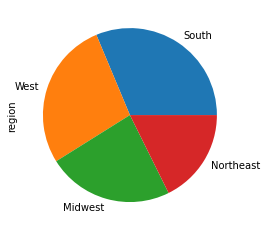

In [9]:
df_reg = df_COP['region'].value_counts().plot.pie()

South is the mostly populated region among Instacart customers, followed by West, Midwest and Northeast.

In [10]:
df_reg.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\pie_df_reg.png')

## 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [11]:
# Create the column "spending_avg" that will contain the mean product prices per user

df_COP['spending_avg'] = df_COP.groupby(['user_id'])['prices'].transform(np.mean)

In [12]:
# Derive the column "spending_flag" with loc()

df_COP.loc[df_COP['spending_avg'] < 10, 'spending_flag'] = 'Low spender'
df_COP.loc[df_COP['spending_avg'] >= 10, 'spending_flag'] = 'High spender'

In [13]:
# Check the frequency

df_COP['spending_flag'].value_counts(dropna = False)

Low spender     3134007
High spender     129249
NaN                 761
Name: spending_flag, dtype: int64

In [14]:
# Use the crosstab to determine the spending habits

df_reg_spend = pd.crosstab(df_COP['region'], df_COP['spending_flag'], dropna = False)

In [15]:
df_reg_spend

spending_flag,High spender,Low spender
region,,
Midwest,30866,733715
Northeast,22517,553918
South,40944,980686
West,34922,865688


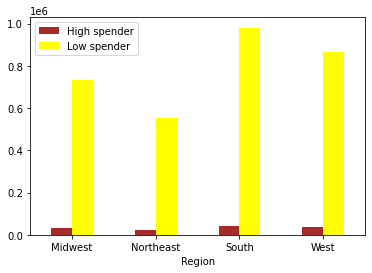

In [16]:
df_reg_spend = df_reg_spend.plot.bar(color=['brown', 'yellow'], xlabel = 'Region', rot = 0).legend(loc='best')

All four regions have unproportionally more Low spenders than High spenders. Since the South region is the mostly populated one, it records the highest number of Low spenders, followed by West, Midwest and Northeast.

In [17]:
df_reg_spend.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_reg_spend.png')

# 4. Low activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export the sample

In [18]:
# Create a new column for "max_order"

df_COP['max_order'] = df_COP.groupby(['user_id'])['order_number'].transform(np.max)

In [19]:
# Display the output

df_COP.head()

,order_id,user_id,order_number,order_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,region,spending_avg,spending_flag,max_order
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,5.72,Low spender,10.0
9,2550362.0,1.0,10.0,4.0,8.0,30.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,5.72,Low spender,10.0
14,2254736.0,1.0,4.0,4.0,7.0,29.0,12427.0,2.0,1.0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,5.72,Low spender,10.0
31,3108588.0,1.0,8.0,1.0,14.0,14.0,10258.0,3.0,1.0,Pistachios,...,Alabama,31,2/17/2019,3,married,40423,South,5.72,Low spender,10.0
47,473747.0,1.0,3.0,3.0,12.0,21.0,30450.0,5.0,0.0,Creamy Almond Butter,...,Alabama,31,2/17/2019,3,married,40423,South,5.72,Low spender,10.0


In [20]:
# Create a new column for customers with less than 5 orders

df_COP.loc[df_COP['max_order'] < 5, 'order_activity'] = 'Low'

df_COP.loc[df_COP['max_order'] >= 5, 'order_activity'] = 'High'

In [21]:
# Check the frequency

df_COP['order_activity'].value_counts(dropna = False)

High    3093076
Low      170941
Name: order_activity, dtype: int64

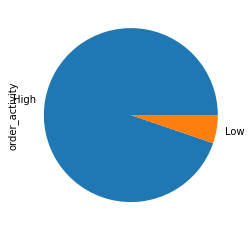

In [22]:
df_activ = df_COP['order_activity'].value_counts().plot.pie()

There is significantly more highly active customers with 5 and more orders than the less acitve shoppers.

In [28]:
df_activ.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\pie_df_activ.png')

In [23]:
# Exclude the low active customers from the dataset by creating a new set with high acitve customers where orders are more than 5 

df_High_Order_Activity = df_COP[df_COP['order_activity'] == 'High']

In [24]:
# Export the file for customer purposes

df_High_Order_Activity.to_pickle(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_CPO_merged_small_high_activity.pkl')

BRAND LOYALTY - how often do the customers return to Instacart?

In [26]:
df_COP['days_since_prior_order'].value_counts(dropna = False) 

7.0     349260
30.0    314080
6.0     252753
5.0     213021
4.0     208645
NaN     208270
8.0     193894
3.0     188298
2.0     146534
9.0     122953
14.0    103519
10.0     97158
1.0      94642
13.0     85838
11.0     82426
12.0     77579
15.0     68284
16.0     46421
0.0      45476
21.0     45066
20.0     38719
17.0     38397
18.0     35203
19.0     33887
22.0     31231
28.0     25459
23.0     22668
27.0     20694
24.0     19656
25.0     18194
26.0     17933
29.0     17859
Name: days_since_prior_order, dtype: int64

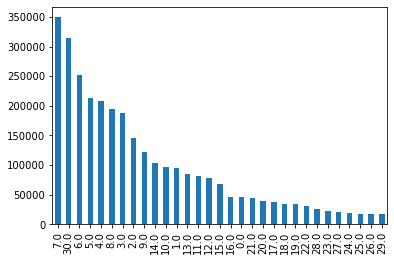

In [27]:
df_returning = df_COP['days_since_prior_order'].value_counts().plot.bar()

Most shoppers return to Instacart after 7 days of prior order.

In [29]:
df_returning.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_returning.png')

In [ ]:
FAMILY STATUS vs. ORDERING HABITS

In [39]:
df_famstatus_spend = pd.crosstab(df_COP['spending_flag'], df_COP['fam_status'], dropna = False)

In [40]:
df_famstatus_spend

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High spender,10664,5468,92181,20936
Low spender,268160,150625,2199827,515395


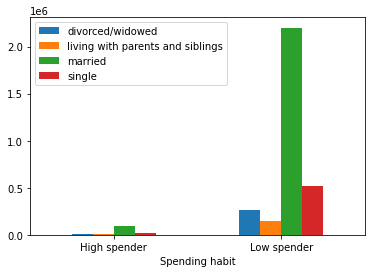

In [41]:
df_famstatus_spend = df_famstatus_spend.plot.bar(xlabel = 'Spending habit', rot = 0).legend(loc='best')

Among customers who pay less than $10 per product, the married are the biggest group.

In [42]:
df_famstatus_spend.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_famstatus_spend.png')

# 5. Customer profiling

# 6. Create an appropriate visualization to show the distribution of profiles.

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

INCOME LEVEL profiles:

In [56]:
# Income level - lower (income <=60000)

df_COP.loc[(df_COP['income'] <= 60000) , 'income_level'] = 'Lower income'

In [57]:
# Income level - middle (income > 50000 and <= 120000)

df_COP.loc[(df_COP['income'] > 60000) & (df_COP['income'] <= 120000) , 'income_level'] = 'Middle income'

In [58]:
# Income level - higher (income > 120000)

df_COP.loc[(df_COP['income'] > 120000) , 'income_level'] = 'Higher income'

In [59]:
df_COP['income_level'].value_counts(dropna = False)

Middle income    1680162
Higher income     963550
Lower income      620305
Name: income_level, dtype: int64

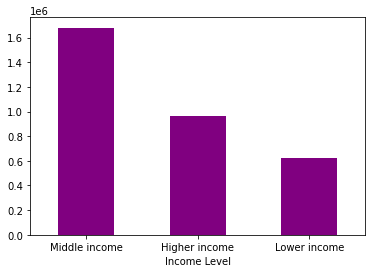

In [60]:
df_inc = df_COP['income_level'].value_counts().plot.bar(color = ['purple'], rot = 0, xlabel = 'Income Level')

In [61]:
df_inc.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_inc.png')

Middle income level customers are the biggest group, followed by Higher and Lower income customers.

PARENT AGE profiles:

In [62]:
# Young parent (age <= 35, n_dependents >=1)

df_COP.loc[(df_COP['age'] <= 35) & (df_COP['n_dependants'] >= 1), 'parent_age'] = 'Young parent'

In [63]:
# Middle-age parent (age > 35 and <= 55, n_dependents >=1)

df_COP.loc[(df_COP['age'] > 35) & (df_COP['age'] <= 55) & (df_COP['n_dependants'] >= 1), 'parent_age'] = 'Middle age parent'

In [64]:
# Older parent (age >55, n_dependents >=1)

df_COP.loc[(df_COP['age'] > 55) & (df_COP['n_dependants'] >= 1), 'parent_age'] = 'Older parent'

In [65]:
df_COP['parent_age'].value_counts(dropna = False)

Older parent         986726
NaN                  815362
Middle age parent    769504
Young parent         692425
Name: parent_age, dtype: int64

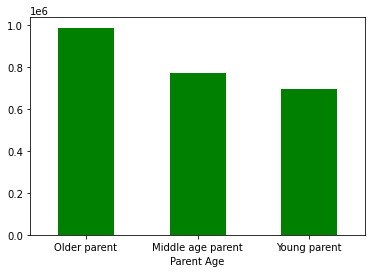

In [66]:
df_parnt = df_COP['parent_age'].value_counts().plot.bar(color = ['green'], rot = 0, xlabel = 'Parent Age')

Instacart customers belong mostly to the Older parent group, followed by Middle age and Young parents.

In [67]:
df_parnt.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_parnt.png')

FAMILY SIZE profiles:

In [68]:
# No dependents (n_dependents =0)

df_COP.loc[(df_COP['n_dependants'] ==0 ), 'fam_size'] = 'No dependents'

In [69]:
# Small family (n_dependents =1)

df_COP.loc[(df_COP['n_dependants'] ==1 ), 'fam_size'] = 'Small family'

In [70]:
# Big family (n_dependents >=2)

df_COP.loc[(df_COP['n_dependants'] >=2 ), 'fam_size'] = 'Big family'

In [71]:
df_COP['fam_size'].value_counts(dropna = False)

Big family       1633950
No dependents     815362
Small family      814705
Name: fam_size, dtype: int64

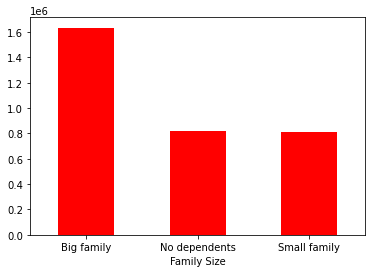

In [73]:
df_fam_size = df_COP['fam_size'].value_counts().plot.bar(color = ['red'], rot = 0, xlabel = 'Family Size')

Big families with dependents of 2 or more are the biggest group among Instacart customers. Smaller families and adults with no dependents count for almost the same number of customers.

In [74]:
df_fam_size.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_fam_size.png')

BABY IN THE HOUSE profiles:

In [75]:
# Baby (department_id = 18 baby products)

df_COP.loc[(df_COP['department_id'] == 18), 'babies']  = 'Baby'

In [76]:
# Baby (department_id != 18 baby products)

df_COP.loc[(df_COP['department_id'] != 18), 'babies']  = 'No baby'

In [77]:
df_COP['babies'].value_counts(dropna = False)

No baby    3221793
Baby         42224
Name: babies, dtype: int64

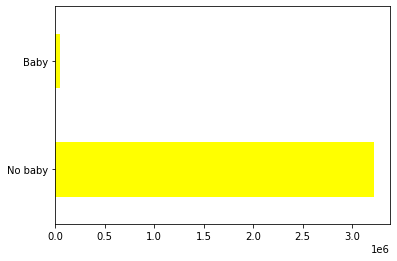

In [78]:
df_babies = df_COP['babies'].value_counts().plot.barh(color = ['yellow'])

Most Instacart customers do not buy baby products.

In [79]:
df_babies.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_babies.png')

MEAT SEAFOOD BUYERS Profiles:

In [80]:
# MEAT SEAFOOD (department_id = 12 meat seafood)

df_COP.loc[(df_COP['department_id'] == 12), 'meat_seafood']  = 'Meat Seafood Buyers'

In [81]:
# MEAT SEAFOOD (department_id != 12 meat seafood)

df_COP.loc[(df_COP['department_id'] != 12), 'meat_seafood']  = 'No Meat Seafood Buyers'

In [82]:
df_COP['meat_seafood'].value_counts(dropna = False)

No Meat Seafood Buyers    3192649
Meat Seafood Buyers         71368
Name: meat_seafood, dtype: int64

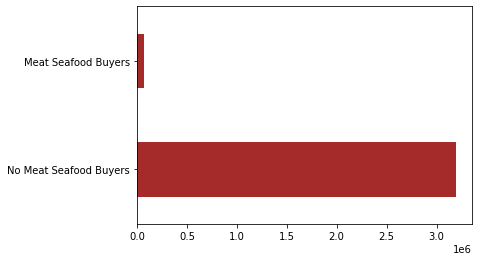

In [83]:
df_meat = df_COP['meat_seafood'].value_counts().plot.barh(color = ['brown'])

Most customers do not buy meat or seafood products with Instacart.

In [84]:
df_meat.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_meat.png')

ALCOHOL BUYERS Profiles:

In [85]:
# ALCOHOL (department_id = 5 alcohol)

df_COP.loc[(df_COP['department_id'] == 5), 'alcohol']  = 'Alcohol'

In [86]:
# ALCOHOL (department_id != 5 alcohol)

df_COP.loc[(df_COP['department_id'] != 5), 'alcohol']  = 'No Alcohol'

In [87]:
df_COP['alcohol'].value_counts(dropna = False)

No Alcohol    3248555
Alcohol         15462
Name: alcohol, dtype: int64

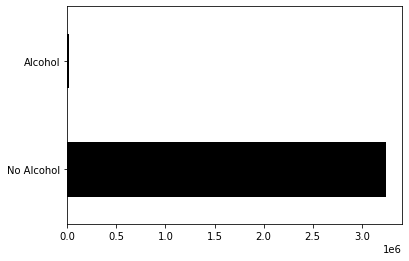

In [88]:
df_alc = df_COP['alcohol'].value_counts().plot.barh(color = ['black'])

Most customers do not buy alcohol on the platform.

In [89]:
df_alc.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_alc.png')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

By the usage frequency on a customer-profile level, I understand how many orders the given group of customers placed with Instacart and by the expenditure - at what price the given group of customers bought their products:

INCOME LEVEL

In [90]:
df_COP.groupby('income_level').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                      mean  min    max
income_level                          
Higher income    17.312986  1.0  100.0
Lower income     16.369912  1.0  100.0
Middle income    17.325850  1.0  100.0

In [91]:
df_COP.groupby('income_level').agg({'prices' : ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_level                          
Higher income  19.797522  1.0  99999.0
Lower income    7.099864  1.0  14900.0
Middle income   9.421926  1.0  99999.0

The average shopping frequency is very similar among all 3 profiles of income level. Lower income level customers ordered only one order less on average than Higher or Middle income customers.

The Higher income customers buy on average the most expensive products. They pay more the double of the prices paid by the Middle and Lower income level clients. 

PARENT AGE

In [74]:
df_COP.groupby('parent_age').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                          mean  min    max
parent_age                                
Middle age parent    17.164857  1.0  100.0
Older parent         17.045291  1.0  100.0
Young parent         17.127599  1.0  100.0

In [75]:
df_COP.groupby('parent_age').agg({'prices' : ['mean', 'min', 'max']})

prices              
                        mean  min      max
parent_age                                
Middle age parent  11.094683  1.0  99999.0
Older parent       12.119574  1.0  99999.0
Young parent       12.329354  1.0  99999.0

Among the Parent Age profiles, all three groups show the same shopping frequency on average and all three groups pay similar average prices for their products.  

FAMILY SIZE

In [78]:
df_COP.groupby('fam_size').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                      mean  min    max
fam_size                              
Big family       17.104917  1.0  100.0
No dependents    17.243217  1.0  100.0
Small family     17.108594  1.0  100.0

In [79]:
df_COP.groupby('fam_size').agg({'prices' : ['mean', 'min', 'max']})

prices              
                    mean  min      max
fam_size                              
Big family     11.837282  1.0  99999.0
No dependents  12.610667  1.0  99999.0
Small family   11.896118  1.0  99999.0

Big famlies, small families and households with no dependents place the same number of orders on average and they also spend almost the same amount of money per product on average.

BABIES:

In [80]:
df_COP.groupby('babies').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                mean  min    max
babies                          
Baby       19.335520  1.0   99.0
No baby    17.111614  1.0  100.0

In [81]:
df_COP.groupby('babies').agg({'prices' : ['mean', 'min', 'max']})

prices              
              mean  min      max
babies                          
Baby      7.676004  1.0     15.0
No baby  12.102822  1.0  99999.0

Customers who order baby products place slighlty more orders on average than those who do not buy baby products, but they buy much cheaper products on average.

MEAT SEAFOOD BUYERS:

In [82]:
df_COP.groupby('meat_seafood').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                               mean  min    max
meat_seafood                                   
Meat Seafood Buyers       15.911291  1.0   99.0
No Meat Seafood Buyers    17.167857  1.0  100.0

In [83]:
df_COP.groupby('meat_seafood').agg({'prices' : ['mean', 'min', 'max']})

prices              
                             mean  min      max
meat_seafood                                   
Meat Seafood Buyers     16.345200  8.0     25.0
No Meat Seafood Buyers  11.948288  1.0  99999.0

Customers who purchase meat or seafood place slighlty less orders on average than those who do not buy theses products, but they buy slightly more expensive products on average.

ALCOHOL BUYERS:

In [84]:
df_COP.groupby('alcohol').agg({'order_number' : ['mean', 'min', 'max']})

order_number            
                   mean  min    max
alcohol                            
Alcohol       15.007955  1.0   99.0
No Alcohol    17.150532  1.0  100.0

In [85]:
df_COP.groupby('alcohol').agg({'prices' : ['mean', 'min', 'max']})

prices              
                 mean  min      max
alcohol                            
Alcohol      8.135694  1.0     15.0
No Alcohol  12.063879  1.0  99999.0

Customers who purchase alcohol place slighlty less orders on average than those who do not buy alcohol, and they spent much less money on their products on average.

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
CUSTOMER PROFILES BY REGIONS

INCOME LEVEL BY REGIONS:

In [95]:
df_reg_inc = pd.crosstab(df_COP['region'],df_COP['income_level'], dropna = False)

In [96]:
df_reg_inc

income_level,Higher income,Lower income,Middle income
region,,,
Midwest,229667,143747,391347
Northeast,171485,108895,296194
South,298170,196736,526952
West,264228,170927,465669


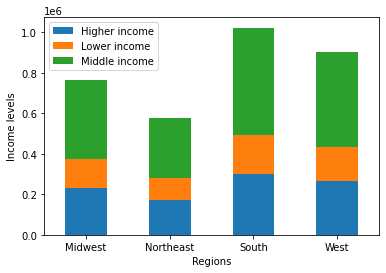

In [97]:
df_reg_inc = df_reg_inc.plot(kind = 'bar', stacked = True, xlabel = 'Regions', ylabel = 'Income levels', rot = 0).legend(loc='best')

In all 4 regions the Middle income houshold represent the majority of customers, followed by Higher income shoppers. The Lower income clients are the smallest group in all 4 regions.

In [98]:
df_reg_inc.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_region_inc.png')

PARENT'S AGE BY REGIONS:

In [99]:
df_reg_parnt = pd.crosstab(df_COP['region'],df_COP['parent_age'], dropna = False)

In [100]:
df_reg_parnt

parent_age,Middle age parent,Older parent,Young parent
region,,,
Midwest,182346,229167,161219
Northeast,135571,176644,121898
South,239724,308741,218912
West,211863,272174,190396


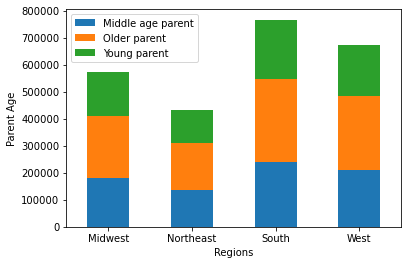

In [101]:
df_reg_parnt = df_reg_parnt.plot(kind = 'bar', stacked = True, xlabel = 'Regions', ylabel = 'Parent Age', rot = 0).legend(loc='best')

Older parents of age 55+ are the majority in all regions, followed by Middle age parents. Younger parents are the least represented group.

FAMILY SIR BY REGIONS:

In [102]:
df_reg_parnt.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_reg_parnt.png')

In [103]:
df_reg_fam_size = pd.crosstab(df_COP['region'],df_COP['fam_size'], dropna = False)

In [104]:
df_reg_fam_size

fam_size,Big family,No dependents,Small family
region,,,
Midwest,379248,192029,193484
Northeast,288423,142461,145690
South,515174,254481,252203
West,451105,226391,223328


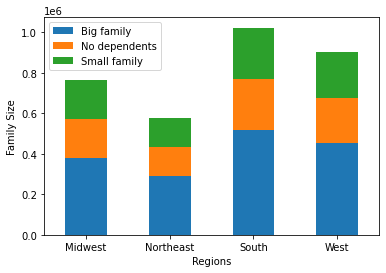

In [105]:
df_reg_fam_size = df_reg_fam_size.plot(kind = 'bar', stacked = True, xlabel = 'Regions', ylabel = 'Family Size', rot = 0).legend(loc='best')

In all regions Big families are the majority, followed by Small families and housholds wiht no dependents.

SPENDING FLAG BY REGIONS:

In [106]:
df_reg_fam_size.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_reg_fam_size.png')

In [107]:
df_reg_spend = pd.crosstab(df_COP['region'],df_COP['spending_flag'], dropna = False)

In [108]:
df_reg_spend

spending_flag,High spender,Low spender
region,,
Midwest,30866,733715
Northeast,22517,553918
South,40944,980686
West,34922,865688


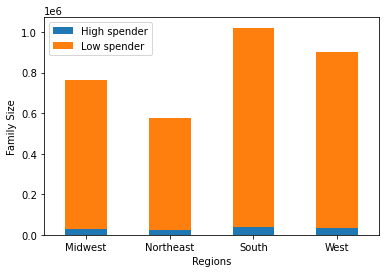

In [109]:
df_reg_spend = df_reg_spend.plot(kind = 'bar', stacked = True, xlabel = 'Regions', ylabel = 'Family Size', rot = 0).legend(loc='best')

All regions have mostly less spending customers.

In [110]:
df_reg_spend.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_reg_spend.png')

CUSTOMER PROFILES by DEPARTMENTS

In the dataset there is no column with department names. I take the names from previous exercises and group them according to their ids. This will help in reading the results.

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [111]:
result = []

for department_id in df_COP['department_id']:
    if (department_id == 1.0):
        result.append('Frozen')
    elif (department_id == 2.0):
        result.append('Other')
    elif (department_id == 3.0):
        result.append('Bakery')
    elif (department_id == 4.0):
        result.append('Produce')
    elif (department_id == 5.0):
        result.append('Alcohol')
    elif (department_id == 6.0):
        result.append('International')
    elif (department_id == 7.0):
        result.append('Beverages')
    elif (department_id == 8.0):
        result.append('Pets')
    elif (department_id == 9.0):
        result.append('Dry Goods, Pasta')
    elif (department_id == 10.0):
        result.append('Bulk')
    elif (department_id == 11.0):
        result.append('Personal Care')
    elif (department_id == 12.0):
        result.append('Meat, Seafood')
    elif (department_id == 13.0):
        result.append('Pantry')
    elif (department_id == 14.0):
        result.append('Breakfast')
    elif (department_id == 15.0):
        result.append('Canned Goods')
    elif (department_id == 16.0):
        result.append('Dairy, Eggs')
    elif (department_id == 17.0):
        result.append('Houshold')
    elif (department_id == 18.0):
        result.append('Babies')
    elif (department_id == 19.0):
        result.append('Snacks')
    elif (department_id == 20.0):
        result.append('Deli')
    elif (department_id == 21.0):
        result.append('Missing')
    else:
        result.append('Not assigned')

In [112]:
df_COP['dpt_name'] = result

In [113]:
df_COP['dpt_name'].value_counts(dropna = False)

Produce             948301
Dairy, Eggs         539522
Snacks              288493
Beverages           268806
Frozen              223101
Pantry              187893
Bakery              117234
Canned Goods        106626
Deli                104743
Dry Goods, Pasta     86701
Houshold             74074
Meat, Seafood        71368
Breakfast            70314
Personal Care        44653
Babies               42224
International        26786
Not assigned         23847
Alcohol              15462
Pets                  9899
Missing               6918
Other                 3639
Bulk                  3413
Name: dpt_name, dtype: int64

DEPARTMETNS BY ORDERS:

In [114]:
df_dept_ord = df_COP.groupby('dpt_name').agg({'order_number' : ['sum']})

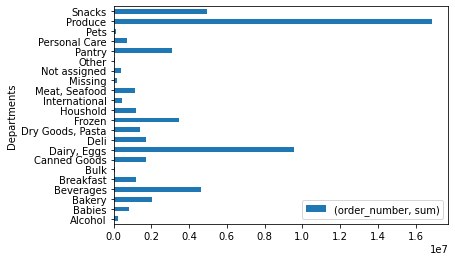

In [115]:
df_dept_ord = df_dept_ord.plot(kind = 'barh', stacked = True, xlabel = 'Departments', ylabel = 'Orders', rot = 0).legend(loc='best')

In [116]:
df_dept_ord.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\barh_df_dept_ord.png')

In [ ]:
INCOME LEVEL BY DEPARTMENTS:

In [117]:
df_dept_inc = pd.crosstab(df_COP['dpt_name'],df_COP['income_level'], dropna = False)

In [118]:
df_dept_inc 

income_level,Higher income,Lower income,Middle income
dpt_name,,,
Alcohol,4950,3183,7329
Babies,12878,5965,23381
Bakery,35810,20600,60824
Beverages,76223,62224,130359
Breakfast,20043,15411,34860
Bulk,901,757,1755
Canned Goods,32792,17120,56714
"Dairy, Eggs",161192,95211,283119
Deli,30805,19654,54284


In [119]:
df_dept_inc.to_csv(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_dept_inc.csv')

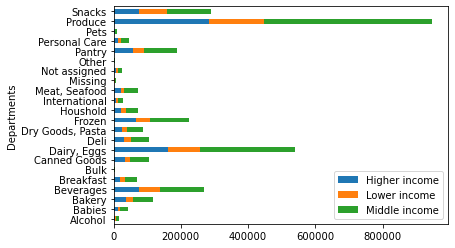

In [120]:
df_dept_inc = df_dept_inc.plot(kind = 'barh', stacked = True, xlabel = 'Departments', ylabel = 'Income Levels', rot = 0).legend(loc='best')

Similary to regions, the Middle income households are the biggest group of buyers within the most popular departments.

In [121]:
df_dept_inc.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\barh_df_dept_inc.png')

PARENT'S AGE BY DEPARTMENTS:

In [122]:
df_dept_parnt = pd.crosstab(df_COP['dpt_name'],df_COP['parent_age'], dropna = False)

In [123]:
df_dept_parnt

parent_age,Middle age parent,Older parent,Young parent
dpt_name,,,
Alcohol,3406,4670,3388
Babies,10290,12566,8837
Bakery,27483,35294,24935
Beverages,63020,82447,55949
Breakfast,16505,21283,15092
Bulk,812,1028,766
Canned Goods,24899,32451,22798
"Dairy, Eggs",126858,162247,115709
Deli,24538,31563,22234


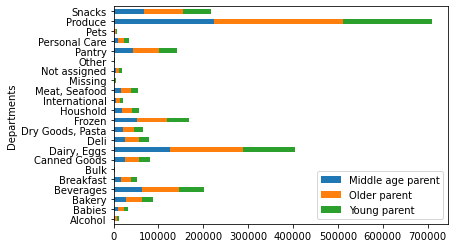

In [124]:
df_dept_parnt = df_dept_parnt.plot(kind = 'barh', stacked = True, xlabel = 'Departments', ylabel = 'Parent Age', rot = 0).legend(loc='best')

All Parent's Age groups are represented similary within the departments with Older parents being in a small majortiy.

In [125]:
df_dept_parnt.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\barh_df_dept_parnt.png')

FAMILY SIZE BY DEPARTMENTS:

In [126]:
df_dept_fam_size = pd.crosstab(df_COP['dpt_name'],df_COP['fam_size'], dropna = False)

In [127]:
df_dept_fam_size

fam_size,Big family,No dependents,Small family
dpt_name,,,
Alcohol,7592,3998,3872
Babies,21265,10531,10428
Bakery,58467,29522,29245
Beverages,134443,67390,66973
Breakfast,35153,17434,17727
Bulk,1719,807,887
Canned Goods,53380,26478,26768
"Dairy, Eggs",269307,134708,135507
Deli,52514,26408,25821


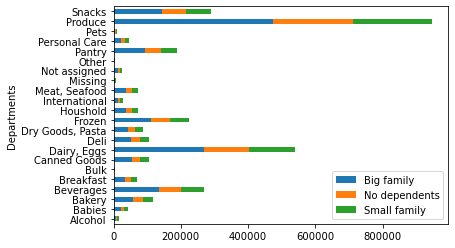

In [128]:
df_dept_fam_size = df_dept_fam_size.plot(kind = 'barh', stacked = True, xlabel = 'Departments', ylabel = 'Family Size', rot = 0).legend(loc='best')

Big families are the biggest buyers within the departments.

In [129]:
df_dept_fam_size.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\barh_df_dept_fam_size.png')

In [ ]:
INCOME LEVEL vs. SPENDING FLAG:

In [130]:
df_spend_inc = pd.crosstab(df_COP['spending_flag'],df_COP['income_level'], dropna = False)

In [131]:
df_spend_inc

income_level,Higher income,Lower income,Middle income
spending_flag,,,
High spender,49047,12959,67243
Low spender,914335,607031,1612641


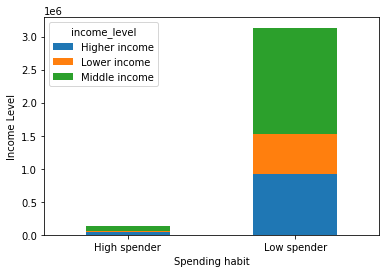

In [132]:
df_spend_inc = df_spend_inc.plot(kind = 'bar', stacked = True, xlabel = 'Spending habit', ylabel = 'Income Level', rot = 0)

Among buyers who spend less than $10 per product the Middle income shoppers are represented the most.

In [133]:
df_spend_inc.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_spend_inc.png')

# Below you will find operations from previous tasks in Achievement 4. Due to problems with the original big data set, I performed these operations on a smaller data set here.

Contents:

1. Busiest hour
2. Busiest day flag
3. Busiest days flag
4. Busiest period of day flag
5. Price range flag
6. Loyalty flag

1. Busiest hour (no flag)
What is the busiest hour of placing orders?

In [134]:
df_COP['order_hour_of_day'].value_counts(dropna = False)

# 10:00 am is the busiest hour of the day when customers place their orders 

10.0    278163
11.0    275386
14.0    270472
15.0    268851
13.0    267767
12.0    263785
16.0    255151
9.0     246668
17.0    210689
8.0     173091
18.0    164934
19.0    127042
20.0     97951
7.0      89625
21.0     80192
22.0     64018
23.0     40948
6.0      29280
0.0      21935
1.0      11649
5.0       8931
2.0       7010
4.0       5283
3.0       5196
Name: order_hour_of_day, dtype: int64

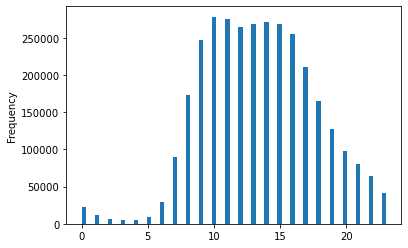

In [135]:
df_ohd = df_COP['order_hour_of_day'].plot.hist(bins = 70)

The most busy hours are between 9 am and 4 pm with the busiest hour at 10 am.
The after-midnight hours are the least busy.

In [136]:
df_ohd.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\historgram_df_ohd.png')

2. Busiest day flag

In [137]:
df_COP['order_of_the_week'].value_counts(dropna = False)

0.0    624344
1.0    569665
6.0    453226
2.0    424411
5.0    422911
3.0    387487
4.0    381973
Name: order_of_the_week, dtype: int64

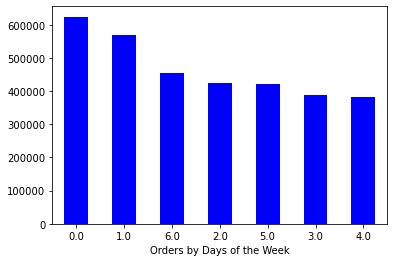

In [138]:
df_oow = df_COP['order_of_the_week'].value_counts().plot.bar(color = ['blue'], rot = 0, xlabel = 'Orders by Days of the Week')

In [139]:
df_oow.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_oow.png')

In [140]:
result = [] 

for value in df_COP['order_of_the_week']:
    if value == 0:
        result.append('busiest day')
    elif value == 4:
        result.append('least busy')
    else:
        result.append('regularly busy')

In [141]:
df_COP['busiest_day'] = result

In [142]:
df_COP['busiest_day'].value_counts(dropna = False)

regularly busy    2257700
busiest day        624344
least busy         381973
Name: busiest_day, dtype: int64

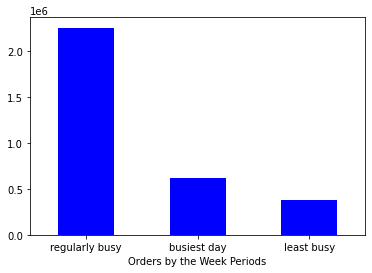

In [143]:
df_busy_day = df_COP['busiest_day'].value_counts().plot.bar(color = ['blue'], rot = 0, xlabel = 'Orders by the Week Periods')

In [144]:
df_busy_day.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_busy_day.png')

3. Busiest days flag

In [145]:
result = [] 

for value in df_COP['order_of_the_week']:
    if (value == 0 or value == 1):
        result.append('Most busy days')
    elif (value == 4 or value == 3):
        result.append('Least busy days')
    else:
        result.append('Regularly busy days')

In [146]:
df_COP['busiest_days'] = result

In [147]:
df_COP['busiest_days'].value_counts(dropna = False)

Regularly busy days    1300548
Most busy days         1194009
Least busy days         769460
Name: busiest_days, dtype: int64

4. Busiest period of day flag

In [167]:
result = [] 

for value in df_COP['order_hour_of_day']:
    if (value >= 9 and value <=17):
        result.append('Most busy period')
    elif value >=1 and value <=5:
        result.append('Least busy period')
    else:
        result.append('Avg busy period')

In [168]:
df_COP['ordering_period'] = result

In [169]:
df_COP['ordering_period'].value_counts(dropna = False)

Most busy period     2336932
Avg busy period       889016
Least busy period      38069
Name: ordering_period, dtype: int64

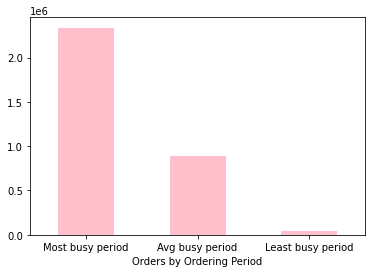

In [170]:
df_bus_period = df_COP['ordering_period'].value_counts().plot.bar(color = ['pink'], rot = 0, xlabel = 'Orders by Ordering Period')

In [171]:
df_bus_period.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_bus_period.png')

5. Price range flag

In [153]:
df_COP.loc[df_COP['prices'] > 15, 'price_range'] = 'High price'

In [154]:
df_COP.loc[(df_COP['prices'] <= 15) & (df_COP['prices'] > 5), 'price_range'] = 'Mid price'

In [155]:
df_COP.loc[df_COP['prices'] <= 5, 'price_range'] = 'Low price'

In [156]:
df_COP['price_range'].value_counts(dropna = False)

Mid price     2185474
Low price     1012359
High price      42337
NaN             23847
Name: price_range, dtype: int64

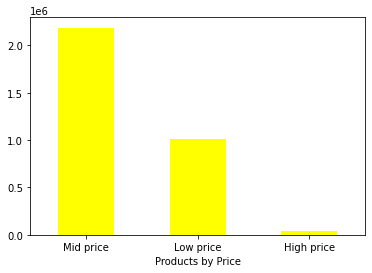

In [157]:
df_price_range = df_COP['price_range'].value_counts().plot.bar(color = ['yellow'], rot = 0, xlabel = 'Products by Price')

The majority of products fall into the middle range prices between $5-15

In [158]:
df_price_range.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_price_range.png')

6. Loyalty flag

In [159]:
df_COP['max_order'] = df_COP.groupby(['user_id'])['order_number'].transform(np.max)

In [160]:
df_COP.loc[df_COP['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [161]:
df_COP.loc[(df_COP['max_order'] <= 40) & (df_COP['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [162]:
df_COP.loc[df_COP['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [163]:
df_COP['loyalty_flag'].value_counts(dropna = False) 

Regular customer    1582261
Loyal customer      1017707
New customer         664049
Name: loyalty_flag, dtype: int64

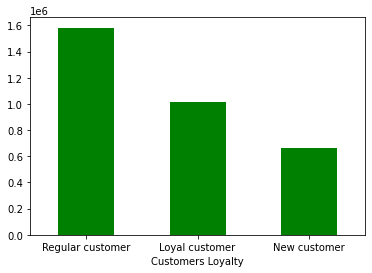

In [164]:
df_loyalty = df_COP['loyalty_flag'].value_counts().plot.bar(color = ['green'], rot = 0, xlabel = 'Customers Loyalty')

In [165]:
df_loyalty.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_loyalty.png')

In [ ]:
LOYALTY BY ORDER ACTIVITY

In [172]:
df_loyal_order = pd.crosstab(df_COP['loyalty_flag'],df_COP['order_activity'], dropna = False)

In [173]:
df_loyal_order

order_activity,High,Low
loyalty_flag,,
Loyal customer,1017707,0
New customer,493108,170941
Regular customer,1582261,0


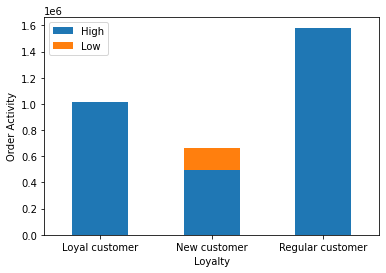

In [174]:
df_loyal_order = df_loyal_order.plot(kind = 'bar', stacked = True, xlabel = 'Loyalty', ylabel = 'Order Activity', rot = 0).legend(loc='best')

Only New customers placed less than 5 orders.

In [176]:
df_loyal_order.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_loyal_order.png')

LOYALTY BY REGIONS

In [175]:
df_reg_loyal = pd.crosstab(df_COP['region'],df_COP['loyalty_flag'], dropna = False)

In [177]:
df_reg_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,234561,156448,373752
Northeast,182417,117490,276667
South,318214,207051,496593
West,282515,183060,435249


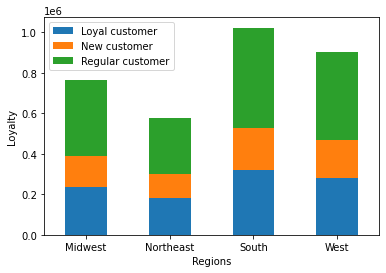

In [178]:
df_reg_loyal = df_reg_loyal.plot(kind = 'bar', stacked = True, xlabel = 'Regions', ylabel = 'Loyalty', rot = 0).legend(loc='best')

In all regions, Regular customers who placed between 10-40 orders have the biggest representation.

In [179]:
df_reg_loyal.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\bar_df_reg_loyal.png')

In [ ]:
LOYALTY BY DEPARTMENTS

In [180]:
df_dept_loyal = pd.crosstab(df_COP['dpt_name'],df_COP['loyalty_flag'], dropna = False)

In [181]:
df_dept_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
dpt_name,,,
Alcohol,3765,4089,7608
Babies,16559,6192,19473
Bakery,37644,23323,56267
Beverages,84037,54228,130541
Breakfast,21771,14650,33893
Bulk,1356,530,1527
Canned Goods,28886,24315,53425
"Dairy, Eggs",180969,101592,256961
Deli,32169,21124,51450


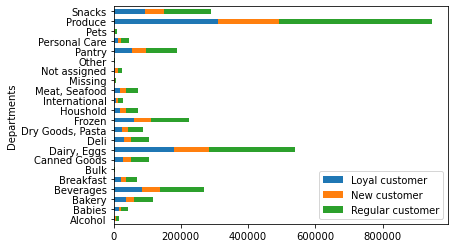

In [182]:
df_dept_loyal = df_dept_loyal.plot(kind = 'barh', stacked = True, xlabel = 'Departments', ylabel = 'Loyalty', rot = 0).legend(loc='best')

Regular customer are th biggest group whithin the most popular departments.

In [185]:
df_dept_loyal.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\barh_df_dept_loyal.png')

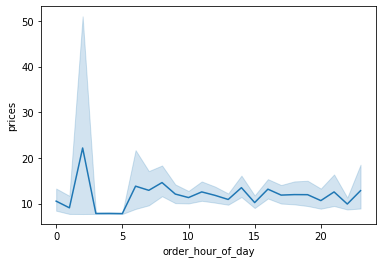

In [184]:
line_ohd_prices = sns.lineplot(data = df_COP, x = 'order_hour_of_day', y = 'prices')

Products with the highest prices are sold in the night hours peaking at 2 am.

In [186]:
line_ohd_prices.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\line_ohd_prices.png')

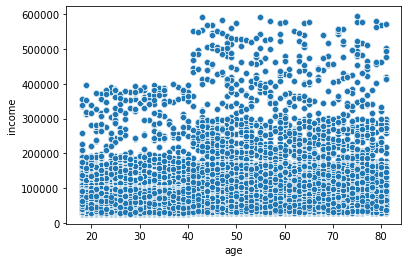

In [187]:
scatter_spending_age = sns.scatterplot(x = 'age', y = 'income', data = df_COP)

There is no direct relationship between age and spending power of a user, but age group 20-40 has siginificantly less spending power than the users 40+.

In [188]:
scatter_spending_age.figure.savefig(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\04 Analysis\Visualizations\scatter_spending_age.png')

In [189]:
df_COP.columns

Index(['order_id', 'user_id', 'order_number', 'order_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spending_avg', 'spending_flag', 'max_order', 'order_activity',
       'income_level', 'parent_age', 'fam_size', 'babies', 'meat_seafood',
       'alcohol', 'dpt_name', 'busiest_day', 'busiest_days', 'ordering_period',
       'price_range', 'loyalty_flag'],
      dtype='object')

In [190]:
df_COP.to_pickle(r'D:\CareerFoundry\Data Immersion\Task 4\Instacart Basket Analysis_2021-07-22\02 Data\Prepared Data\df_CPO_TASK_4_10_FINAL.pkl')